# **Hand written digit classification**

**MNIST** or **Modified National Institute of Standards and Technology** database is one of the first known large databases of image data. This contains about 60,000 images of handwritten digits.  


In this notebook we attempt to train a ANN network to classify the images. We demontrate how to build a neural network using Tensorflow and train it on the MNIST dataset. We finally test the model performence on a test data set.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

The following is one example of the type of input we are handling.

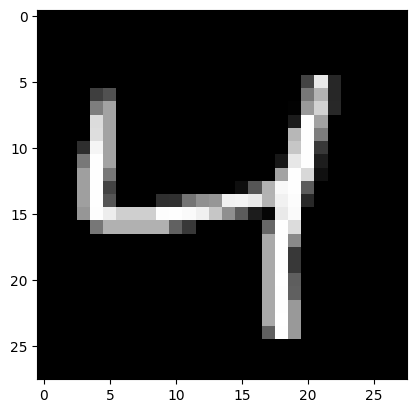

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2], cmap = "gray")

We normalize the data by dividing the inputs by 255 therefore all the numbers in the image array go from  range of (0-255)  to (0 - 1). normalising helps prevent exploding gradients and helps the model to converge faster.


In [ ]:
X_train = X_train/255
X_test = X_test/255

the following is the model architecture. The model contains -  

* An input layer is  of shape (28, 28),  the same as the dimension of images. The image is flattened from a 2D array to 1D array to form the model inputs.


*  The hidden layers consist of two dense layer with 138 and 32 neurons respectively. Each of them use a ReLu activation.


* The output contains a softmax funtion that outputs a 10 dimensional vector containing a probabillity distibution that signifies  the probability of each digit occuring.








In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 dense_12 (Dense)            (None, 32)                4128      
                                                                 
 dense_13 (Dense)            (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


The model uses loss funtion  - `sparse categorical crossentorpy` as this is a multiclass classification problem and we use the `Adam` optimiser .


we monitor the model accuracy to track the model performence while training.

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0106 - accuracy: 0.9965 - val_loss: 0.1642 - val_accuracy: 0.9734
Epoch 2/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.1559 - val_accuracy: 0.9753
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.1495 - val_accuracy: 0.9756
Epoch 4/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.1592 - val_accuracy: 0.9762
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.1923 - val_accuracy: 0.9724
Epoch 6/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0088 - accuracy: 0.9971 - val_loss: 0.1671 - val_accuracy: 0.9772
Epoch 7/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.1687 - val_accuracy:

In [ ]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9747

(Text(0.5, 1.0, 'accuracy vs val accuracy'),
 <matplotlib.legend.Legend at 0x787a09c562f0>)

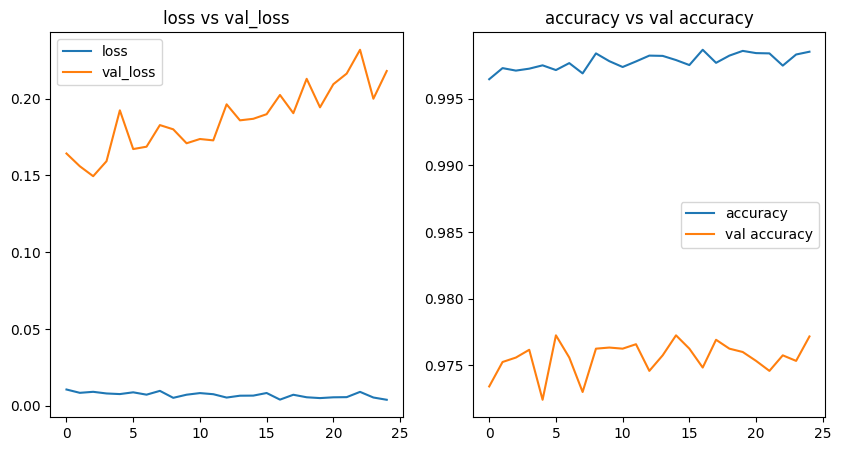

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(1,2, 1)
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.title("loss vs val_loss"), plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = "accuracy")
plt.plot(history.history['val_accuracy'], label = "val accuracy")
plt.title("accuracy vs val accuracy"), plt.legend()


In [ ]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

array([2])

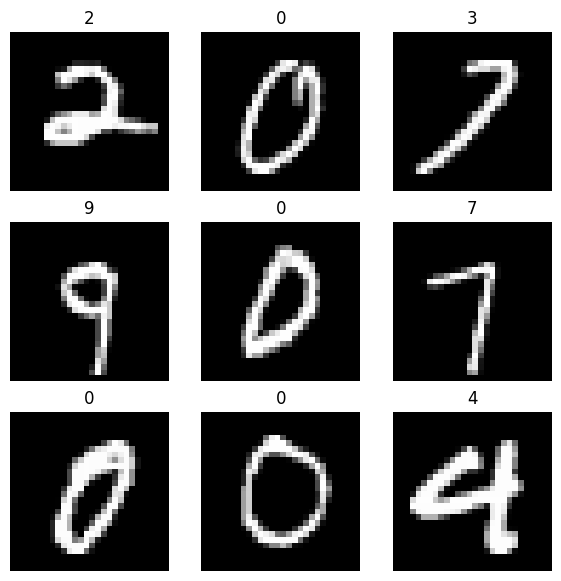

In [ ]:
plt.figure(figsize = (7, 7))
for i in range(1, 10):

  idx = np.random.randint(1, len(X_test))
  preds = model.predict(X_test[idx].reshape(1,28,28), verbose = 0).argmax(axis=1)[0]
  plt.subplot(3, 3, i), plt.imshow(X_test[idx],cmap = "gray"), plt.title(preds), plt.axis("off")


Here we test  9 random test samples and note that the model perdfectly  classifies alll the samples.